In [1]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)

In [2]:
from astropy.timeseries import LombScargle
frequency, power = LombScargle(t, y).autopower()

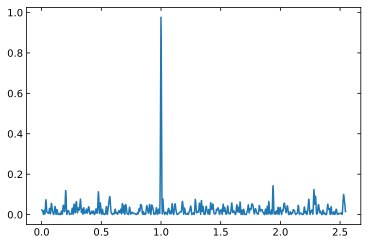

In [4]:
import matplotlib.pyplot as plt  
%config InlineBackend.figure_format = "svg"

plt.plot(frequency, power)   

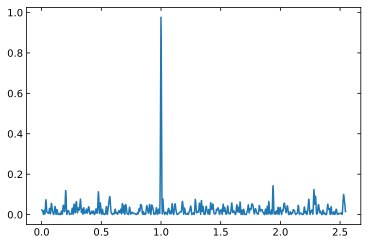

In [6]:
dy = 0.1
frequency, power = LombScargle(t, y, dy).autopower()

plt.plot(frequency, power)  

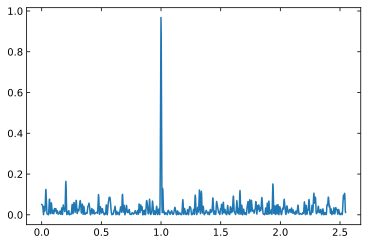

In [7]:
dy = 0.1 * (1 + rand.rand(100))
y = np.sin(2 * np.pi * t) + dy * rand.randn(100)
frequency, power = LombScargle(t, y, dy).autopower()

plt.plot(frequency, power) 

In [11]:
import astropy.units as u
t_days = t * u.day
y_mags = y * u.mag
dy_mags = y * u.mag
frequency, power = LombScargle(t_days, y_mags, dy_mags).autopower()

In [10]:
frequency.unit

Unit("1 / d")

In [12]:
power.unit

Unit(dimensionless)

In [13]:
frequency, power = LombScargle(t, y, dy).autopower(nyquist_factor=2)
len(frequency), frequency.min(), frequency.max()  

(500, 0.0010189890448009111, 1.0179700557561102)

In [15]:
frequency, power = LombScargle(t, y, dy).autopower(nyquist_factor=10)
len(frequency), frequency.min(), frequency.max() 

(2500, 0.0010189890448009111, 5.0939262349597545)

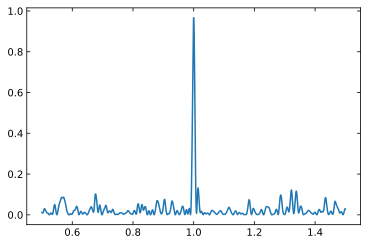

In [17]:
frequency = np.linspace(0.5, 1.5, 1000)
power = LombScargle(t, y, dy).power(frequency)

plt.plot(frequency, power) 

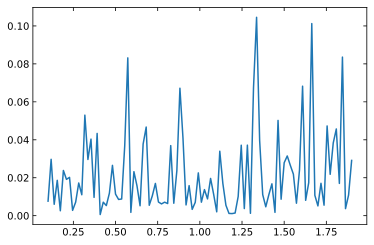

In [18]:
frequency = np.linspace(0.1, 1.9, 100)
power = LombScargle(t, y, dy).power(frequency)
plt.plot(frequency, power)  

884


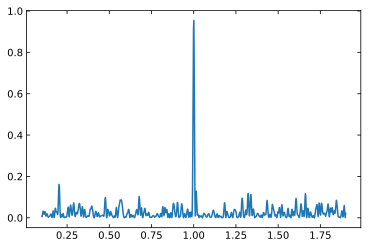

In [19]:
frequency, power = LombScargle(t, y, dy).autopower(minimum_frequency=0.1,
                                                   maximum_frequency=1.9)
print(len(frequency))

plt.plot(frequency, power)  

1767


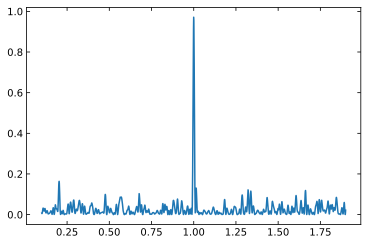

In [20]:
frequency, power = LombScargle(t, y, dy).autopower(minimum_frequency=0.1,
                                                   maximum_frequency=1.9,
                                                   samples_per_peak=10)
print(len(frequency))

plt.plot(frequency, power) 

In [21]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(t, y, dy)
y_fit = ls.model(t_fit, best_frequency)